<a href="https://colab.research.google.com/github/DonRoboto/Cursos/blob/master/Jorge_Calvillo_ClasificacionCifar_10Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Construye tu clasificador de imágenes a color
En este ejercicio propondrás una red convolucional diferente a la utilizada en la explicación del material M6.3 para clasificar Cifar 10.
Tu objetivo será alcanzar un desempeño similar a ~75% de exactitud (accuracy) al clasificar con datos de validación (test).
Podrás basarte en el modelo descrito en M6.3 y cambiar los hiperparámetros: añadir o quitar capas de convolucionales, pooling o dense. Tambien puedes variar el tamaño y número de kernels o filtros, etc.
Recuerda que las clases son las siguientes:
- 0 -> aviones
- 1 -> automóviles
- 2 -> aves
- 3 -> gatos
- 4 -> venados
- 5 -> perros
- 6 -> ranas
- 7 -> caballos
- 8 -> barcos
- 9 -> tractocamiones

In [0]:
# Añade las 2 líneas para importar la nueva versión 2.0 de tensorflow
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

In [0]:
# Importa las librerías
import matplotlib.pyplot as plt                 # Librería para graficar
import numpy as np                              # Librería para cálculos matemáticos
from tensorflow.keras.datasets import cifar10   # Función para descargar las imágenes de Cifar 10

# EJERCICIO
# Importa las funciones de keras con la adecuación para usar tensorflow 2.0
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras import optimizers, backend
from keras.utils import np_utils
from tensorflow.keras.callbacks import ModelCheckpoint


In [0]:
# Obtención de las imágenes y sus etiquetas
# La función load_data() da como respuesta los grupos de entrenamiento y test por separado
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
# Imprimimos el tamaño de los conjuntos de entrenamiento y prueba
print('El numero de imágenes en el conjunto x_train es:', x_train.shape[0])
print('El numero de etiquetas en el conjunto y_train es:', y_train.shape[0])
print('El numero de imágenes en el conjunto x_test es:', x_test.shape[0])
print('El numero de etiquetas en el conjunto y_test es:', y_test.shape[0])

El numero de imágenes en el conjunto x_train es: 50000
El numero de etiquetas en el conjunto y_train es: 50000
El numero de imágenes en el conjunto x_test es: 10000
El numero de etiquetas en el conjunto y_test es: 10000


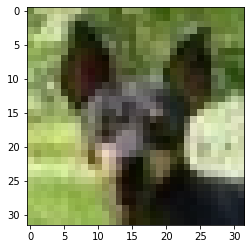

La imagen de entrenamiento 2500, corresponde con la etiqueta: [5]


In [0]:
# Inspección visual de los datos

# EJERCICIO
# Grafica algunas imágenes del dataset y checa sus etiquetas
n_imagen = 2500
etiqueta = y_train[n_imagen]
plt.imshow(x_train[n_imagen], cmap='gray')
plt.show()
print('La imagen de entrenamiento {}, corresponde con la etiqueta: {}'.format(n_imagen, etiqueta))

## Preprocesamiento de los datos
Cuando se entrenan redes neuronales convolucionales no es necesario aplanar las imágenes en un vector, se usan con su formato matricial y numero de canales 3 (RGB).  
Sin embargo, es recomendable escalar los valores de los pixeles de 0-255 a 0-1.
También es necesario convertir a codificación 1-hot las etiquetas. Con 1-hot pasamos de tener una etiqueta que representa la clase 4 a un vector de 10 elementos donde el 4° elemento sea un 1 (comenzando desde la posición 0)
etiqueta 4 -> 0000100000

In [0]:
# Con astype establecemos la precisión de los números a flotantes de 32 bits
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# EJERCICIO
# Escala los valores de los pixeles para que esten en el rango de 0 a 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [0]:
# EJERCICIO
# Aplica codificación 1-hot de las etiquetas
y_train1 = np_utils.to_categorical(y_train)
y_test1 = np_utils.to_categorical(y_test)

# Visualiza la etiqueta 100 codificada
print(y_train[100], ' -> ', y_train1[100])

[8]  ->  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


## Creación del modelo 

Gran parte del trabajo para construir modelos de Deep Learning se centra en la experimentación. 
Propon un modelo, entrénalo y cambia los hiperparámetros. Analiza los resultados. ¿Qué puedes concluir?

In [0]:
# EJERCICIO
# Escribe la línea de código que elimina información previa de los modelos 
backend.clear_session()

In [0]:
# EJERCICIO
# Define tu modelo
modeloConv = Sequential()
modeloConv.add(Conv2D(64, kernel_size=(4,4), activation = 'relu', use_bias = True, input_shape = (32,32,3)))
modeloConv.add(MaxPooling2D(pool_size=(2,2)))
modeloConv.add(Conv2D(128, kernel_size=(3,3), activation = 'relu', use_bias = True))
modeloConv.add(MaxPooling2D(pool_size=(2,2)))
modeloConv.add(Conv2D(256, kernel_size=(3,3), activation = 'relu', use_bias = True))
modeloConv.add(Conv2D(512, kernel_size=(3,3), activation = 'relu', use_bias = True))
modeloConv.add(MaxPooling2D(pool_size=(2,2)))
modeloConv.add(Flatten())
modeloConv.add(Dense(128, activation='relu', use_bias=True))
modeloConv.add(Dense(256, activation='relu', use_bias=True))
modeloConv.add(Dense(512, activation='relu', use_bias=True))
modeloConv.add(Dense(1024, activation='relu', use_bias=True))
modeloConv.add(Dense(10, activation='softmax', use_bias=True))


In [0]:
# EJERCICIO
# Muestra la tabla con las características de tu modelo
modeloConv.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 29, 29, 64)        3136      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 256)         295168    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 2, 2, 512)         1180160   
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 1, 1, 512)        

## Entrenamiento del modelo

In [0]:
# EJERCICIO
# Define del optimizador Adam
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0)

# EJERCICIO
# Compila el modelo
modeloConv.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Define un checkpointer para guardar los pesos sinapticos de la red
checkpointer = ModelCheckpoint('modelo_v1.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1 )

In [0]:
# Entrena tu modelo, recuerda utilizar las etiquetas generadas por la codificación 1-hot (y_train1, y_test1)
M = modeloConv.fit(x_train, y_train1, validation_data=(x_test, y_test1), epochs=20, batch_size=32, shuffle=True, callbacks=[checkpointer], verbose=1 )

Epoch 1/20
1563/1563 [==============================] - ETA: 0s - loss: 1.6585 - accuracy: 0.3712
Epoch 00001: val_accuracy improved from -inf to 0.44660, saving model to modelo_v1.h5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6585 - accuracy: 0.3712 - val_loss: 1.4670 - val_accuracy: 0.4466
Epoch 2/20
1560/1563 [============================>.] - ETA: 0s - loss: 1.2637 - accuracy: 0.5397
Epoch 00002: val_accuracy improved from 0.44660 to 0.59000, saving model to modelo_v1.h5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2635 - accuracy: 0.5399 - val_loss: 1.1407 - val_accuracy: 0.5900
Epoch 3/20
1560/1563 [============================>.] - ETA: 0s - loss: 1.0735 - accuracy: 0.6132
Epoch 00003: val_accuracy improved from 0.59000 to 0.61730, saving model to modelo_v1.h5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0736 - accuracy: 0.6132 - val_loss: 1.0869 - val_accuracy: 0.6173
Epoch 4/20
1558/1563 [==================

## Evaluación del modelo

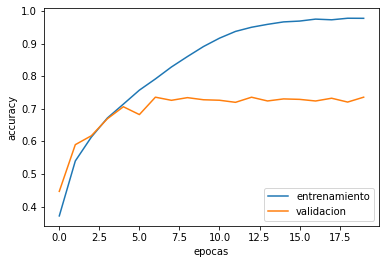

In [0]:
# EJERCICIO
# Grafica el accuracy (exactitud) con datos de entrenamiento y validación
plt.plot(M.history['accuracy'], label='entrenamiento')
plt.plot(M.history['val_accuracy'], label='validacion')
plt.legend(loc='lower right')
plt.xlabel('epocas')
plt.ylabel('accuracy')
plt.show()

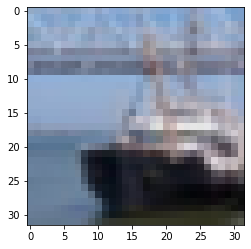

La imagen 2600, tiene la etiqueta [8], el modelo lo clasifica como: [8]


In [0]:
# EJERCICIO
# Realiza algunas clasificaciones con las imágenes de test
n_imagen = 2600
imagen = x_test[n_imagen]
etiqueta = y_test[n_imagen]
prediccion = modeloConv.predict_classes(imagen.reshape(1,32,32,3))

# Gráfica de la imagen
plt.imshow(imagen)
plt.show()
print('La imagen {}, tiene la etiqueta {}, el modelo lo clasifica como: {}'.format(n_imagen, etiqueta, prediccion))

In [0]:
# EJERCICIO
# Evalua tu modelo mediante la función evaluate y muestra el error y accuracy en la ultima época
evaluacion = modeloConv.evaluate(x_test, y_test1)
error = evaluacion[0]
accuracy = evaluacion[1]
print("error final del modelo {}".format(error))
print("accuracy final del modelo {}".format(accuracy))

313/313 [==============================] - 1s 4ms/step - loss: 1.4351 - accuracy: 0.7358
error final del modelo 1.4351133108139038
accuracy final del modelo 0.73580002784729
